In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import os 
import seaborn as sns
import glob
import natsort

In [2]:
import seaborn as sns
import copy

def load_data(save_path):
    datas = list()
    path_list = glob.glob(save_path)
    path_list = natsort.natsorted(path_list)
    data_temp = get_concat_glob(path_list)
    data_temp["a1"] = data_temp["a1"] * 100
    data_temp["a3"] = data_temp["a3"] * 100
    data_temp['Distribution'] = data_temp['distribution'] .map({0: "IID partition", 
                                                                0.3: "Non-IID partition (α=0.3)"})
    return data_temp

In [14]:
def get_concat_glob(paths):
    data_ = []
    for i, path in enumerate(paths):

        if "LN" in path: continue
        # if "WD" in path: continue
        if "FCs" in path: continue
        if "G1" in path: continue
        if "Mean" in path: continue
        if "gs" in path: continue        
        if "hs" in path: continue
        if "Mask" in path: continue
        if "LR001" in path: continue
        
        data = pd.read_csv(path)
        data["Mode"] = data["mode"]
        data["Scaling"] = "vanilla"

        if "Output_GU" in path and "__GU" in path and "LR" in path:
            data["Scaling"] = path.split("__GU")[1].split("/")[0] 
            # continue
        elif "__GU" in path: 
            number = float(path.split("__GU")[1].split("/")[0])
            # print(number)
            data["Scaling"] = "GU" + str(number)
        elif "__GGU" in path: 
            number = float(path.split("__GGU")[1].split("/")[0])
            # print(number)
            data["Scaling"] = "GGU" + str(number)
        # else:
        #     print(path)

        if len(data_) == 0: 
            # print(path)
            data_ = data
        else: 
            # print(path)
            data_ = pd.concat([data_, data])
    return data_

### CIFAR100, All

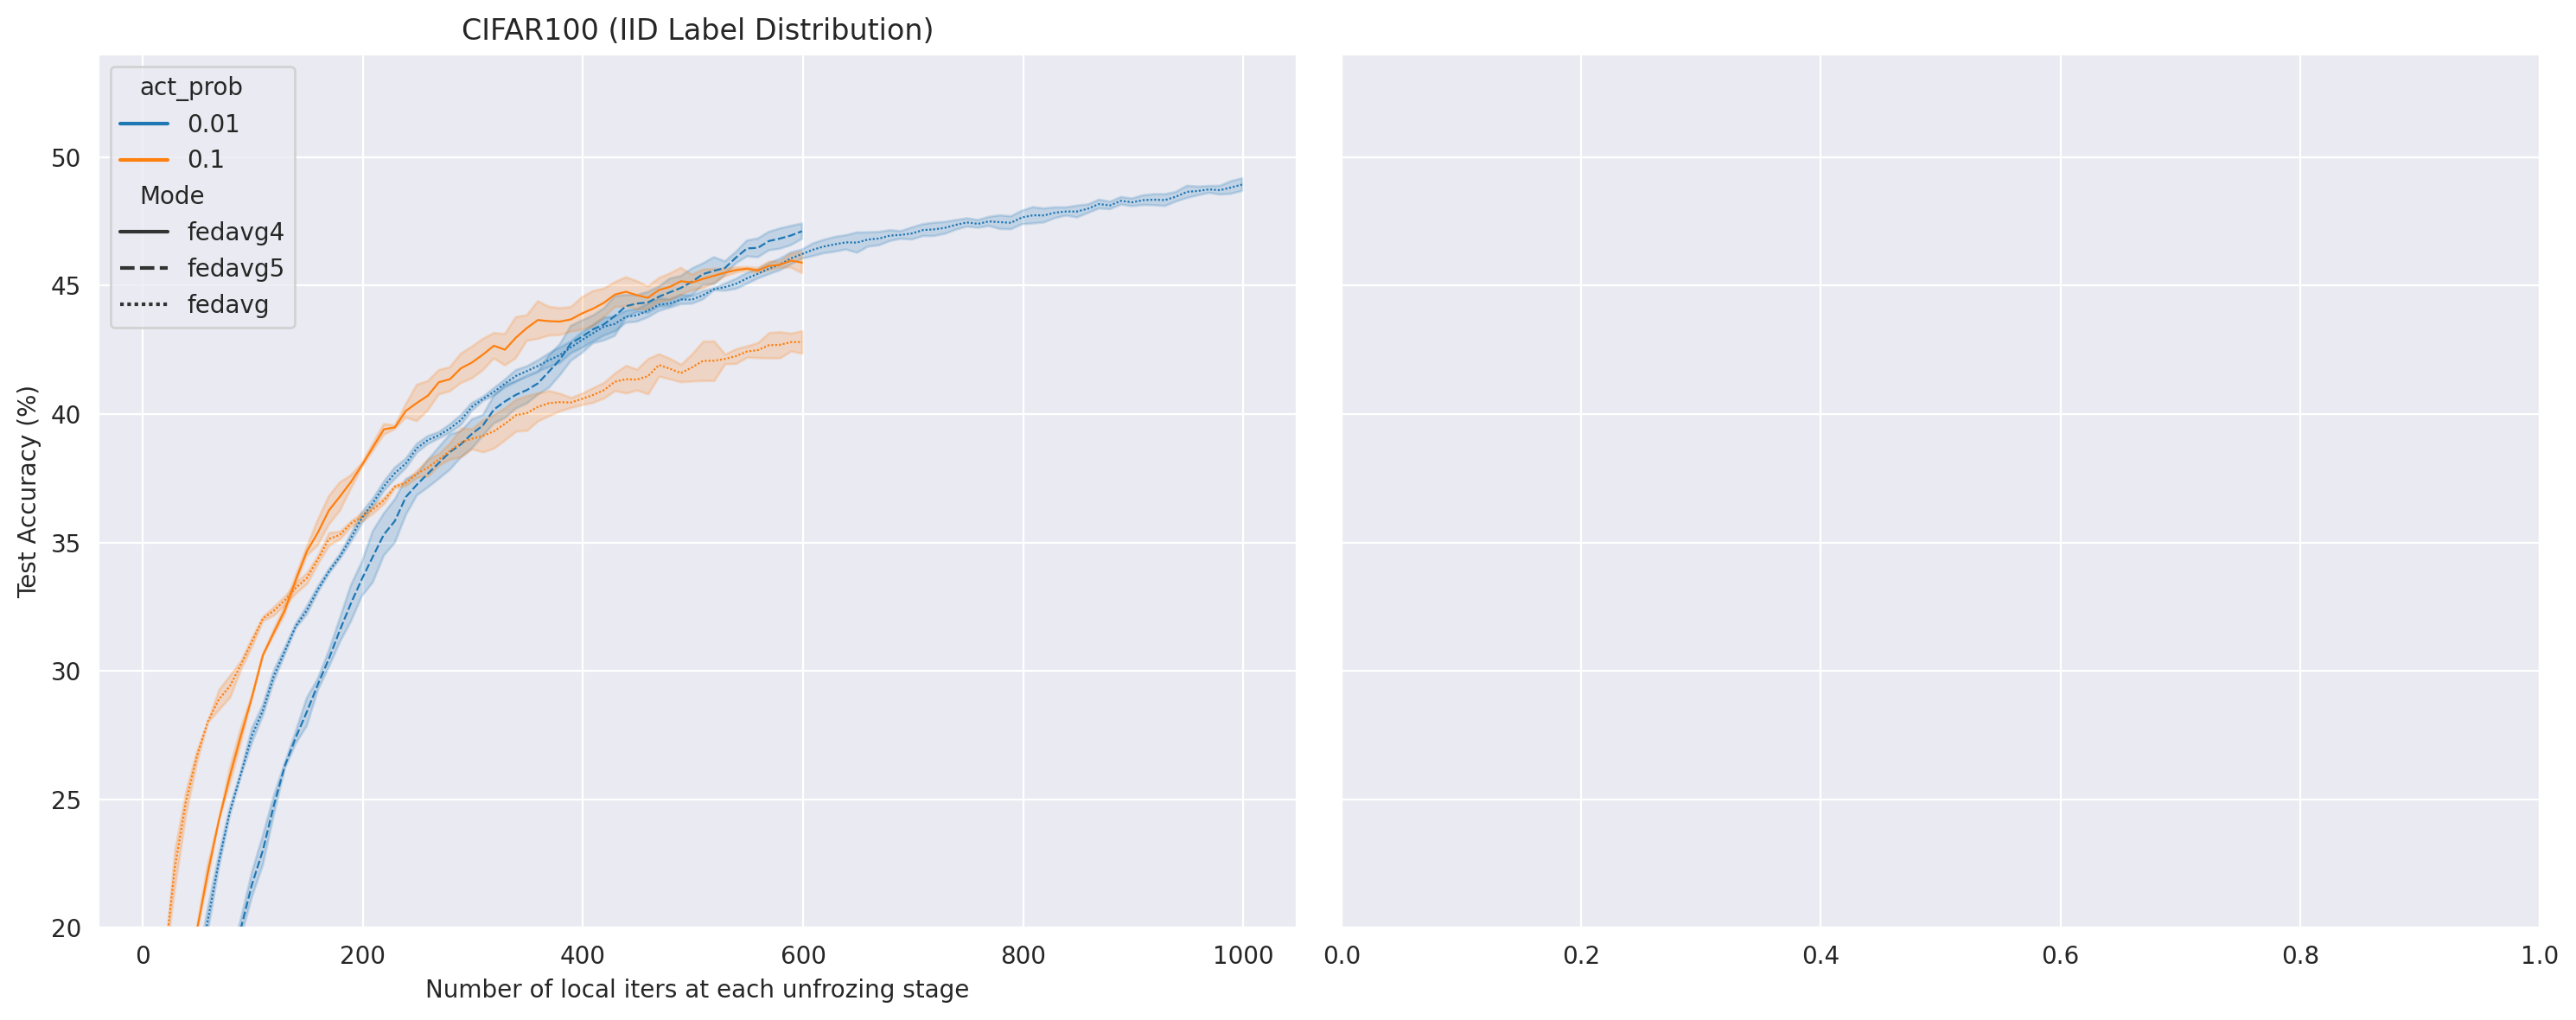

In [67]:
data_temp = load_data("../Output_GU_C100/CIFAR100-*-N100-*/s[1-9].csv")

for algo in ["fedavg"]:
    fig, axes = plt.subplots(1, 2, figsize=(15,6), dpi=200, sharey=True)
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        # temp = temp[temp["act_prob"] == 0.01]
        # temp = temp[temp["Scaling"] == "vanilla"]
        # temp = temp[temp["epoch"] == 999]
        temp = temp[(temp["Mode"] == "fedavg") | (temp["Mode"] == "fedavg1") | (temp["Mode"] == "fedavg2") | (temp["Mode"] == "fedavg3") | (temp["Mode"] == "fedavg4") | (temp["Mode"] == "fedavg5")]
        temp = temp[(temp["Mode"] == "fedavg") | (temp["Mode"] == "fedavg4") | (temp["Mode"] == "fedavg5")]
        temp = temp[(temp["Scaling"] == "vanilla")]
        if iid == 0.: 
            temp = temp[(temp["Distribution"] == "IID partition")]
            title = "CIFAR100 (IID Label Distribution)"
        elif iid == 0.3: 
            temp = temp[(temp["Distribution"] != "IID partition")]
            title = "CIFAR100 (Non-IID Label Distribution)"
        ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="act_prob", style="Mode", palette="tab10", errorbar="se", linewidth = 0.8)
        ax.set_ylim([20, 54])
        ax.set_ylabel("Test Accuracy (%)")
        ax.set_xlabel("Number of local iters at each unfrozing stage")
        ax.set_title(title)
        break
    fig.tight_layout()
    plt.pause(0.1)

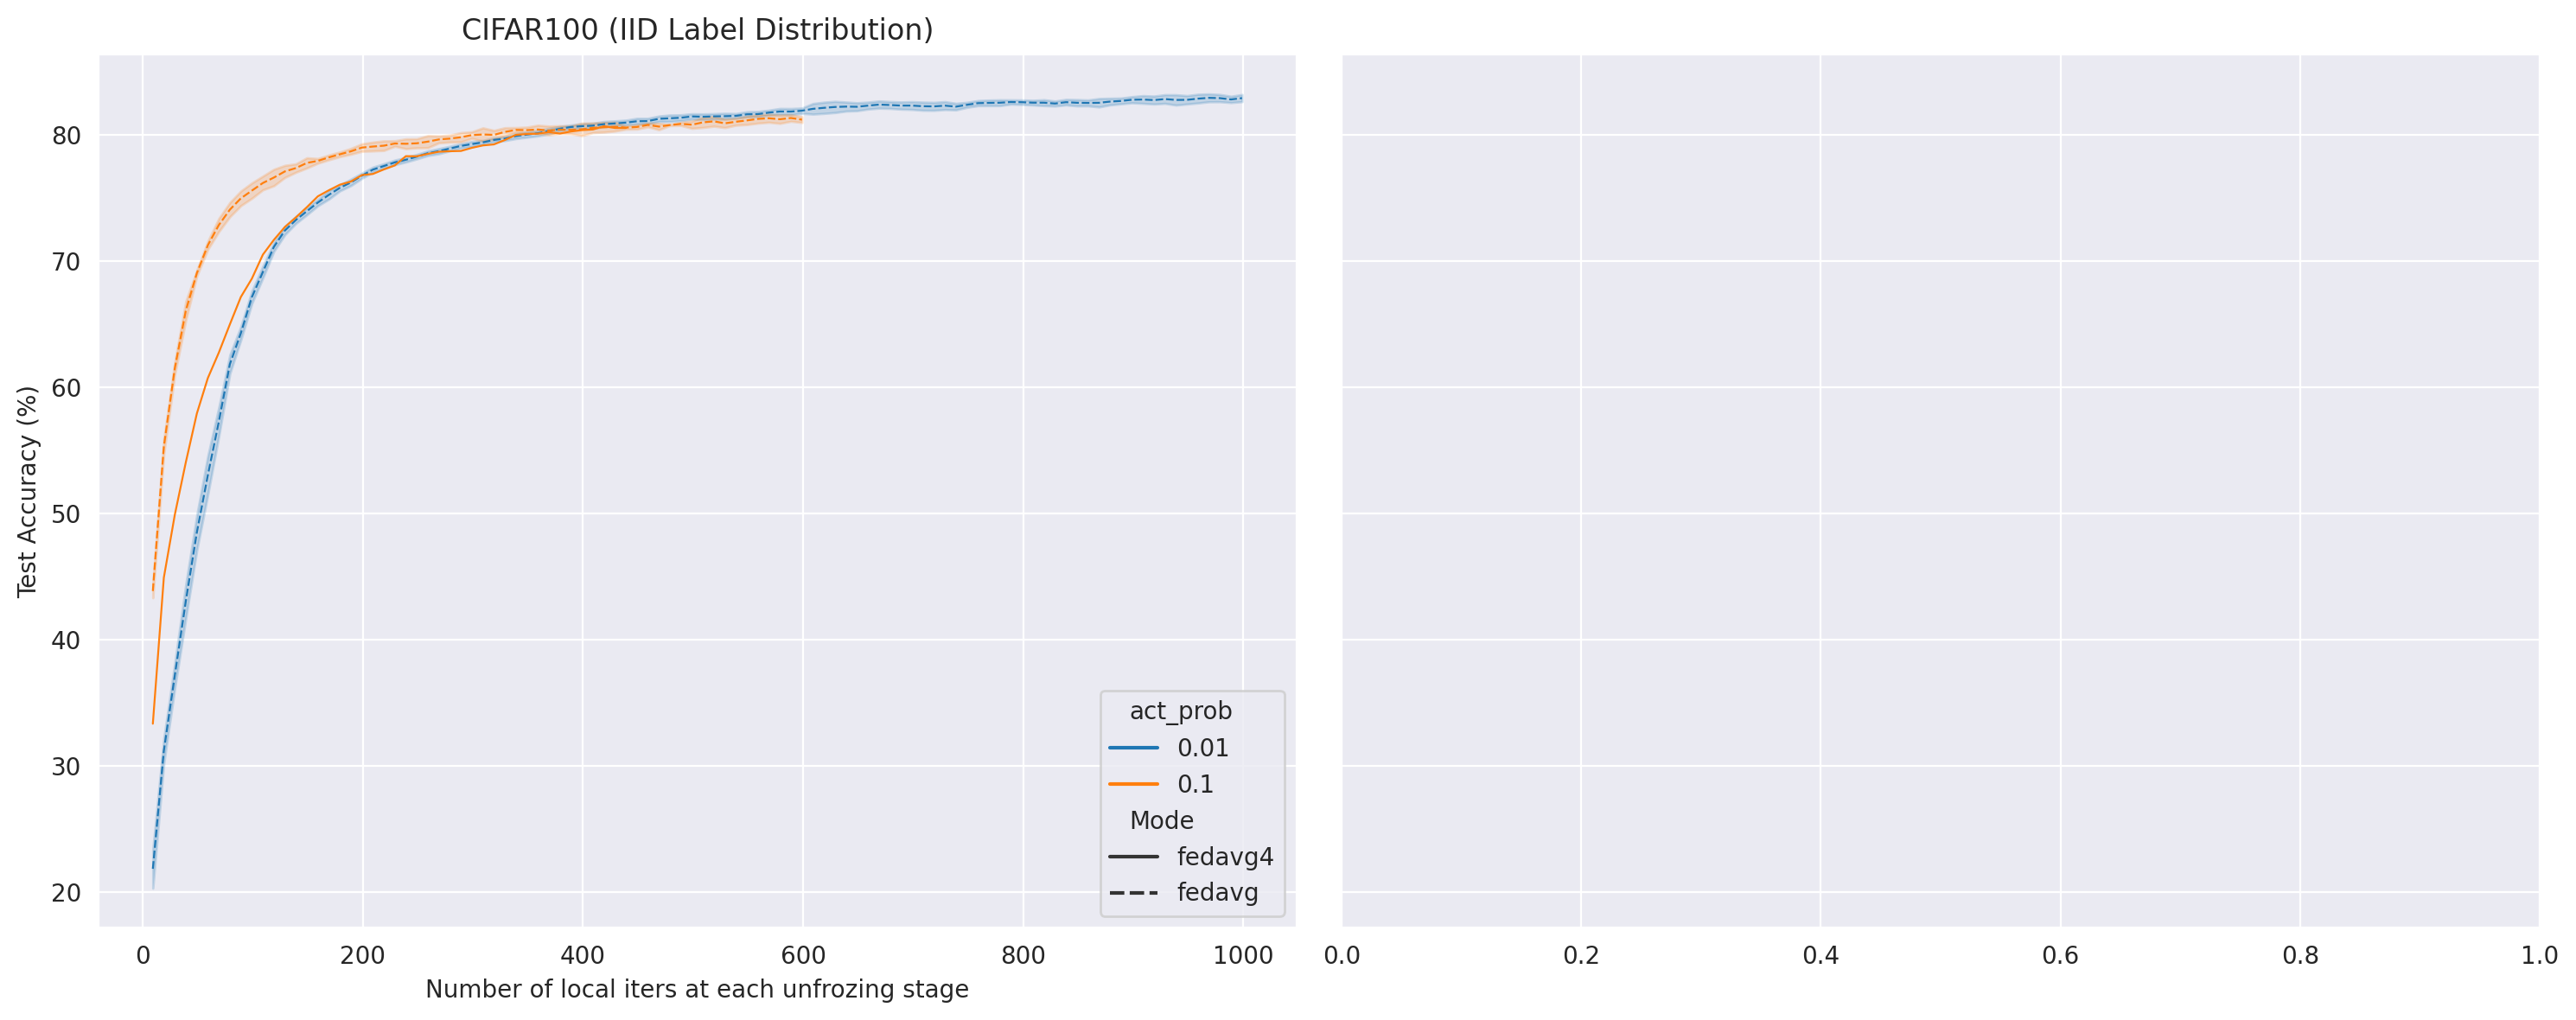

In [70]:
data_temp = load_data("../Output_GU_C10/CIFAR10-*-N100-*/s[1-9].csv")

for algo in ["fedavg"]:
    fig, axes = plt.subplots(1, 2, figsize=(15,6), dpi=200, sharey=True)
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        # temp = temp[temp["act_prob"] == 0.01]
        # temp = temp[temp["Scaling"] == "vanilla"]
        # temp = temp[temp["epoch"] == 999]
        temp = temp[(temp["Mode"] == "fedavg") | (temp["Mode"] == "fedavg1") | (temp["Mode"] == "fedavg2") | (temp["Mode"] == "fedavg3") | (temp["Mode"] == "fedavg4") | (temp["Mode"] == "fedavg5")]
        temp = temp[(temp["Mode"] == "fedavg") | (temp["Mode"] == "fedavg4") | (temp["Mode"] == "fedavg5")]
        temp = temp[(temp["Scaling"] == "vanilla")]
        if iid == 0.: 
            temp = temp[(temp["Distribution"] == "IID partition")]
            title = "CIFAR100 (IID Label Distribution)"
        elif iid == 0.3: 
            temp = temp[(temp["Distribution"] != "IID partition")]
            title = "CIFAR100 (Non-IID Label Distribution)"
        ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="act_prob", style="Mode", palette="tab10", errorbar="se", linewidth = 0.8)
        # ax.set_ylim([20, 54])
        ax.set_ylabel("Test Accuracy (%)")
        ax.set_xlabel("Number of local iters at each unfrozing stage")
        ax.set_title(title)
        break
    fig.tight_layout()
    plt.pause(0.1)

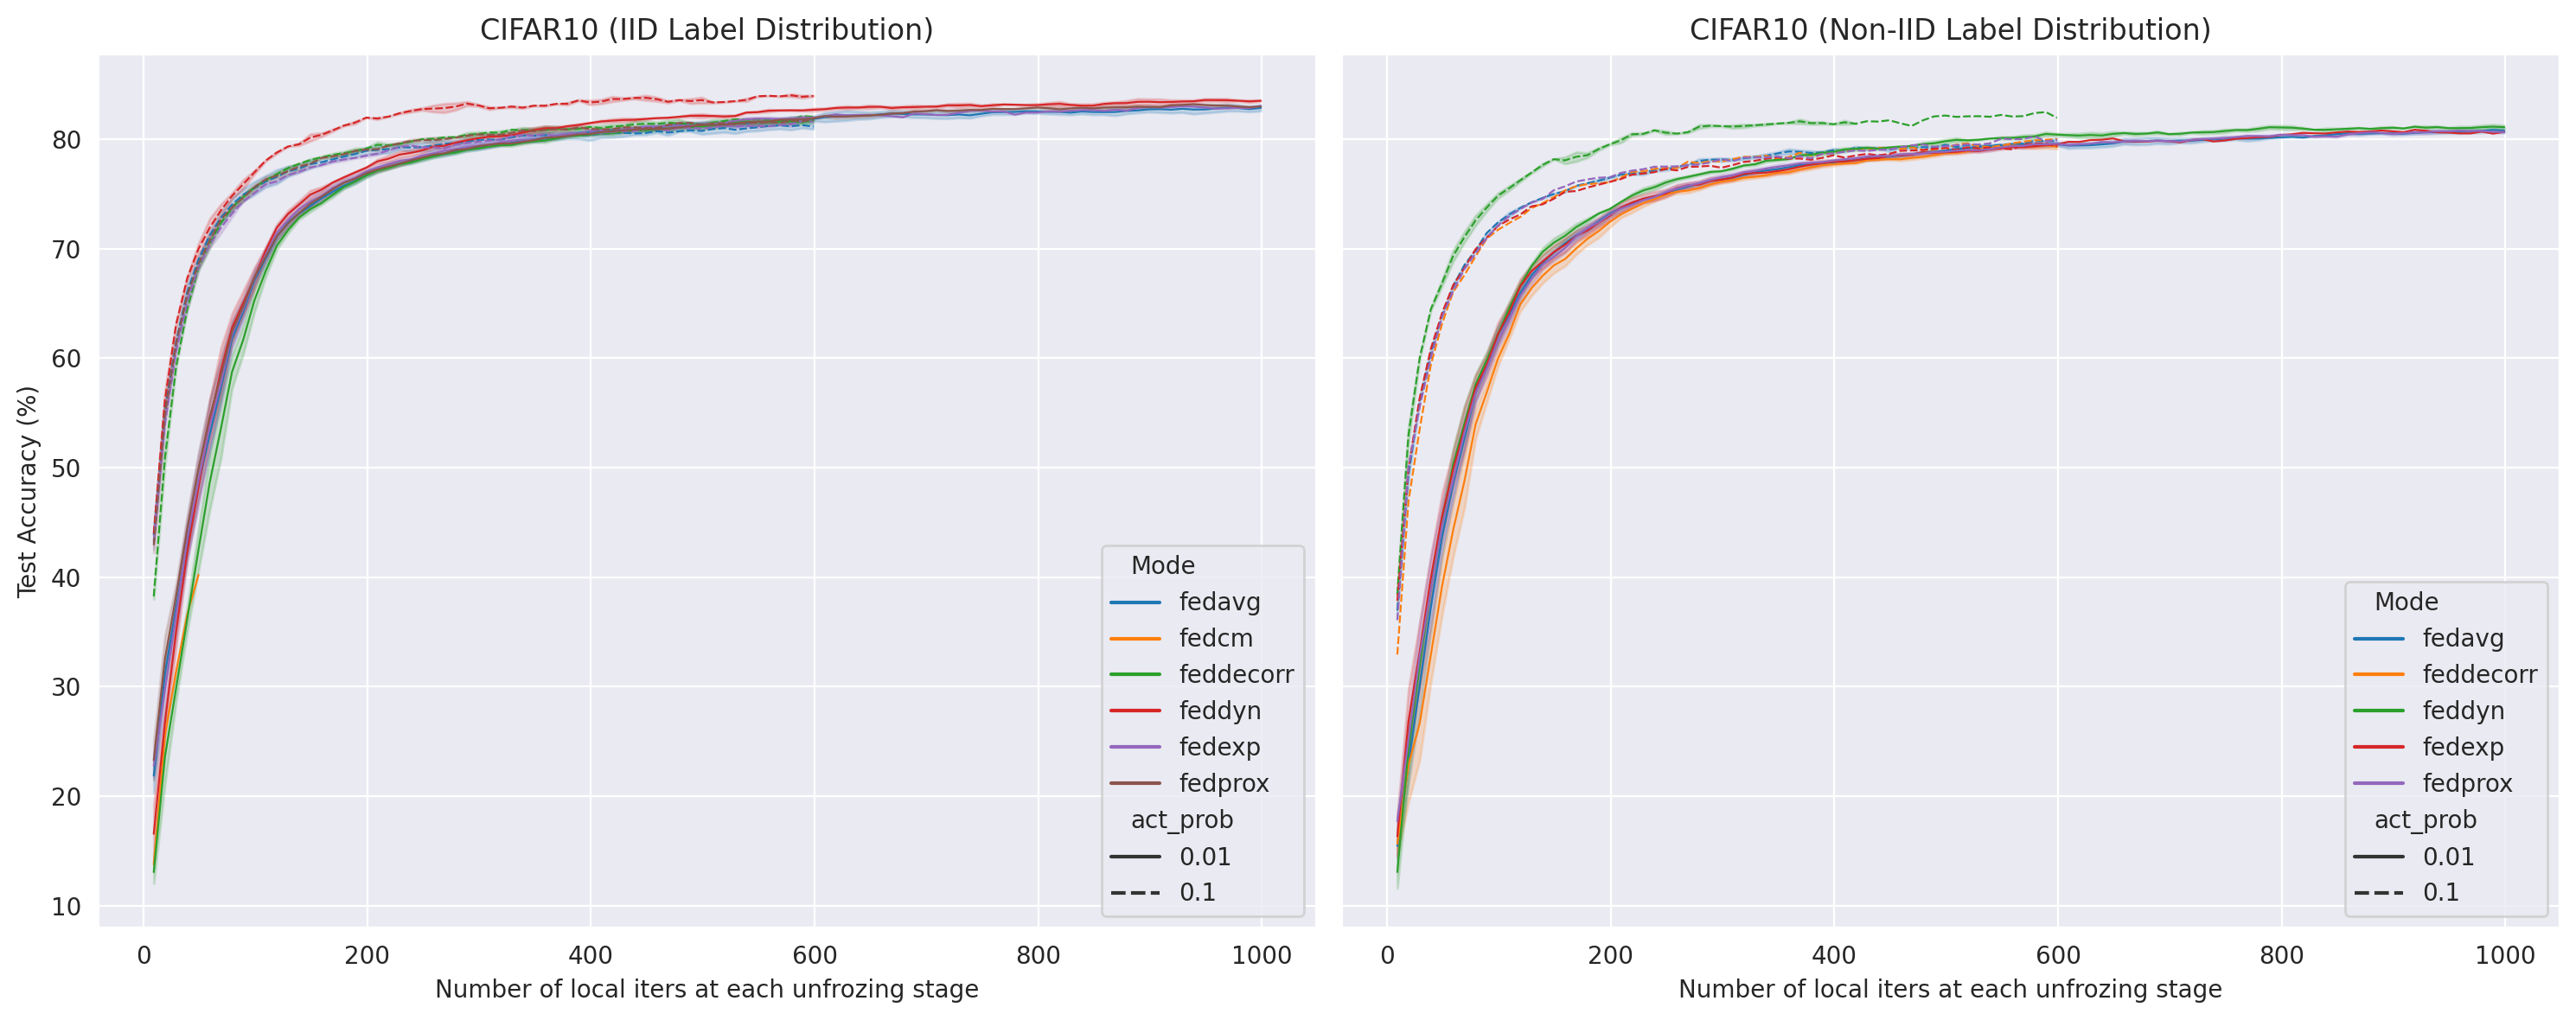

In [50]:
data_temp = load_data("../Output_GU_C10/CIFAR10-*-N100-*/s[1-9].csv")

for algo in ["fedavg"]:
    fig, axes = plt.subplots(1, 2, figsize=(15,6), dpi=200, sharey=True)
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        # temp = temp[temp["act_prob"] == 0.01]
        temp = temp[temp["Scaling"] == "vanilla"]
        # temp = temp[temp["epoch"] == 999]
        if iid == 0.: 
            temp = temp[(temp["Distribution"] == "IID partition")]
            title = "CIFAR10 (IID Label Distribution)"
        elif iid == 0.3: 
            temp = temp[(temp["Distribution"] != "IID partition")]
            title = "CIFAR10 (Non-IID Label Distribution)"
        ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="Mode", style="act_prob", palette="tab10", errorbar="se", linewidth = 0.8)
        # ax.set_ylim([70, 85])
        ax.set_ylabel("Test Accuracy (%)")
        ax.set_xlabel("Number of local iters at each unfrozing stage")
        ax.set_title(title)
    fig.tight_layout()
    plt.pause(0.1)
    